In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

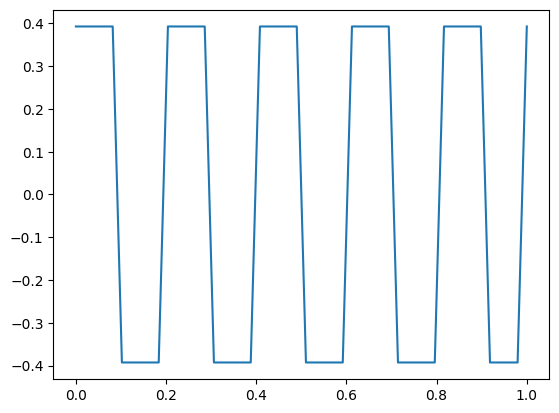

In [2]:
time_series = np.linspace(0, 1, 50)
phi = np.pi/8*signal.square(2 * np.pi * 5 * time_series)
plt.plot(time_series, phi)

In [40]:
def trajectory_gen_1(phi, v, L):
    R = L / np.tan(phi)

    omega = v / R

    theta = omega * time_series # dependencies: omega

    x_ref = R * np.cos(theta) # dependencies: R,  theta
    y_ref = R * np.sin(theta) # dependencies: R,  theta
    theta_ref = np.arctan2(np.diff(x_ref), np.diff(y_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.arctan2(np.diff(y_ref), np.diff(x_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.append(theta_ref, theta_ref[-1])

    # theta_ref
    x_initial = -3
    y_initial = 3

    x_ref = x_ref + (x_initial - x_ref[0])
    y_ref = y_ref + (y_initial - y_ref[0])

    return x_ref, x_ref, theta_ref

def trajectory_gen(x_initial=-3, y_initial=3):
    x_ref = np.linspace(0, 10, 100)
    y_ref = 2*np.sin(2 * np.pi * x_ref * 0.2)

    # theta_ref = np.arctan2(np.diff(x_ref), np.diff(y_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.arctan2(np.diff(y_ref), np.diff(x_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.append(theta_ref, theta_ref[-1])

    x_ref = x_ref + (x_initial - x_ref[0])
    y_ref = y_ref + (y_initial - y_ref[0])

    return x_ref, y_ref, theta_ref

def trajectory_gen_inf(x_initial=-3, y_initial=3):
    t = np.linspace(0, np.pi * 2, 30)
    scale = 10 / (3 - np.cos(2*t))
    x_ref = scale * np.cos(t);
    y_ref = scale * np.sin(2*t) / 2

    # theta_ref = np.arctan2(np.diff(x_ref), np.diff(y_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.arctan2(np.diff(y_ref), np.diff(x_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.append(theta_ref, theta_ref[-1])

    x_ref = x_ref + (x_initial - x_ref[0])
    y_ref = y_ref + (y_initial - y_ref[0])

    return x_ref, y_ref, theta_ref


x_ref, y_ref, theta_ref = trajectory_gen_inf()

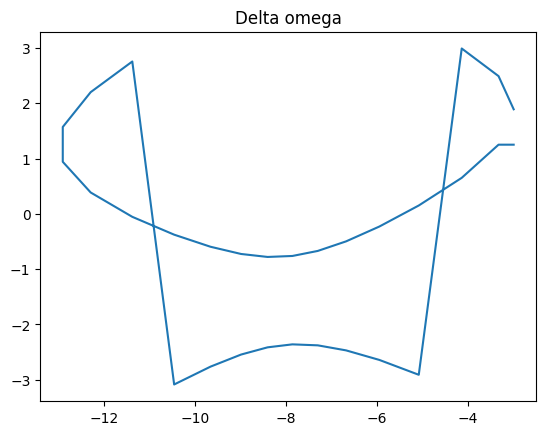

In [41]:
plt.title("Delta omega")
plt.plot(x_ref, theta_ref)

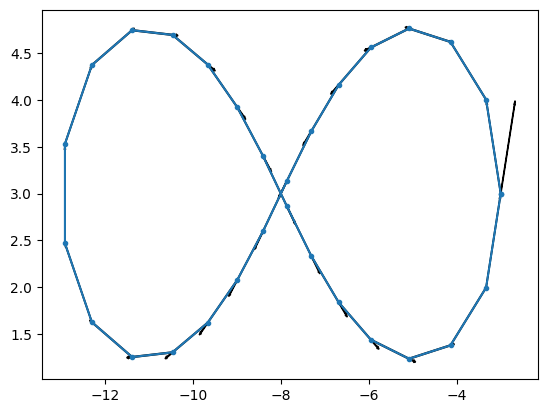

In [42]:
plt.plot(x_ref, y_ref, ".-")

for i, (x, y) in enumerate(zip(x_ref, y_ref)):
    if i >= len(theta_ref):
        break

    plt.arrow(x, y, np.cos(theta_ref[i]), np.sin(theta_ref[i]), width=0.01)

## Find nearest arc length points

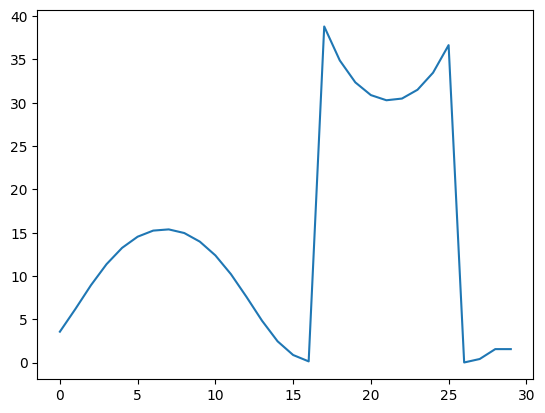

In [105]:
theta_ref[theta_ref < 0] += 2 * np.pi
target = 0
target = target + 2*np.pi if target < 0 else target
obj_func = np.square(theta_ref - target)
np.argmin(obj_func)

plt.plot(obj_func)

## find nearest temporal point 

In [84]:
import numpy.ma as ma
last_nearest_point = 20
diff = np.expand_dims(np.linspace(0, 20), 1)
distance_2_trajectory = np.linalg.norm(diff - 4, axis=1)
mask = np.ones_like(distance_2_trajectory)

gain = 3
upper_lim = last_nearest_point + gain
lower_lim = last_nearest_point - gain
if last_nearest_point == 0:
    mask = 0
elif upper_lim >= len(distance_2_trajectory):
    tmp = upper_lim - len(distance_2_trajectory)
    mask[max(0, lower_lim):] = 0
    mask[:tmp] = 0
else:
    mask[max(0, lower_lim):upper_lim] = 0
distance_2_trajectory = ma.masked_array(distance_2_trajectory, mask=mask)
np.argmin(distance_2_trajectory)
distance_2_trajectory
# mask

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, 2.9387755102040813, 3.3469387755102042,
                   3.755102040816327, 4.163265306122449,
                   4.571428571428571, 4.979591836734695, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True, False, False, False, False, False, False,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True],
       fill_value=1e+20)

In [7]:
class Test:
    def __init__(self) -> None:
        self.huy = 0

a = Test()
hasattr(a, "huy")

True

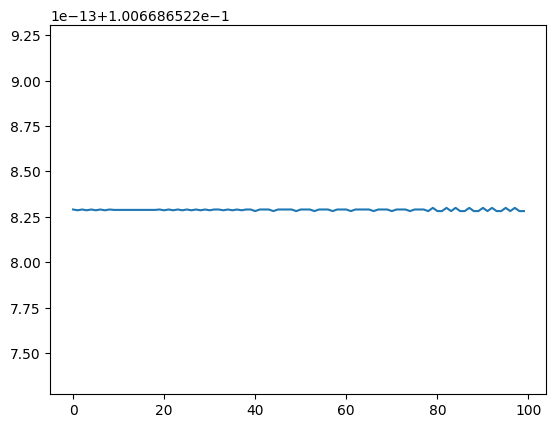

In [8]:
theta_ref = np.arctan(np.diff(x_ref), np.diff(y_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
theta_ref = np.append(theta_ref, theta_ref[-1])

# plt.subplot(221)
plt.plot(theta_ref)
# plt.subplot(222)
# plt.plot(time_series, theta)

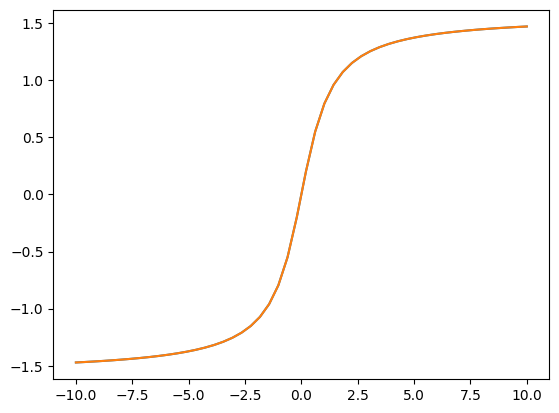

In [9]:

x = np.linspace(-10, 10, 50)
x
plt.plot(x, np.arctan(x))
plt.plot(x, np.arctan2(x, 1))

# Test tf.transformations

In [9]:
# ! pip install transformations
import transformations as tftr 
import numpy as np

# theta = -0.0077
x = 0.00031086702840867037
y = 0.0038416466761944175
z = -0.08235310919634171
w = 0.9965957608369611

# # theta = 1.57
x = -0.0020890327439889904
y = 0.0032433163053800645
z = 0.539877537771358
w = 0.8417347331858617
orientation = tftr.euler_from_quaternion([x, y, z, w])
orientation

(1.1405927211006477, -0.0077157442344882015, -3.1415778175517484)

In [11]:
def norm_angle(theta):
    while theta > np.pi:
        theta -= 2* np.pi

    while theta <= -np.pi:
        theta += 2* np.pi

    return theta

In [28]:
x = 1
y = 2
theta = 0

state = np.array([x, y, 0, 1])

theta_goal = 1.57
x_goal = 3
y_goal = 3

delta_theta = 0
# delta_theta = theta - init_theta
rotation_matrix = np.array([
    [np.cos(theta_goal), -np.sin(theta_goal), 0],
    [np.sin(theta_goal), np.cos(theta_goal), 0],
    [0, 0, 1]
])
state_matrix = np.vstack([x_goal - x, y_goal - y, 0])

t_matrix = np.block([
            [rotation_matrix, state_matrix],
            [0, 0, 0, 1]])

t_matrix

array([[ 7.96326711e-04, -9.99999683e-01,  0.00000000e+00,
         2.00000000e+00],
       [ 9.99999683e-01,  7.96326711e-04,  0.00000000e+00,
         1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [31]:
np.linalg.inv(t_matrix) @ state.T

array([0.99920336, 1.00079601, 0.        , 1.        ])

In [32]:
t_matrix@ state.T

array([7.96960847e-04, 2.00159234e+00, 0.00000000e+00, 1.00000000e+00])

In [14]:
transformation_matrix = np.hstack((np.vstack((rotation_matrix, [0, 0])), state_matrix))
transformation_matrix

array([[-8.10441171e-04, -9.99999672e-01, -3.00000000e+00],
       [ 9.99999672e-01, -8.10441171e-04, -3.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [15]:
transformation_matrix @ np.array((x, y ,0))

array([-0.0011987 , -0.00160097,  0.        ])

In [16]:
print("intit_x:", init_x)
print("intit_y:", init_y)
print("intit_theta:", init_theta)
print(transformation_matrix @ np.array((1, 0, 1)))


intit_x: -3
intit_y: -3
intit_theta: 1.57
[-3.00081044 -2.00000033  0.        ]
